In [1]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree


from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import os

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import missingno as msn
pd.options.mode.chained_assignment = None 
from sklearn.externals import joblib
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor 

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression

In [7]:
data_hour_merge = pd.read_csv("/home/paw/DanielBustillos/contaminación_24mayo/datos_modelos.csv")

In [8]:
len(data_hour_merge)

36344

In [9]:
data_hour_merge = data_hour_merge.iloc[:,1:]

In [10]:
data_hour_merge_14 =data_hour_merge.copy() 

In [11]:
data_hour_merge_14["RHforecast_24"] = data_hour_merge.RH.shift(24)
data_hour_merge_14["RHforecast_24"] = data_hour_merge.RH.shift(23)
data_hour_merge_14["RHforecast_22"] = data_hour_merge.RH.shift(22)
data_hour_merge_14["RHforecast_21"] = data_hour_merge.RH.shift(21)
data_hour_merge_14["RHforecast_20"] = data_hour_merge.RH.shift(20)
data_hour_merge_14["RHforecast_19"] = data_hour_merge.RH.shift(19)
data_hour_merge_14["RHforecast_18"] = data_hour_merge.RH.shift(18)
data_hour_merge_14["RHforecast_17"] = data_hour_merge.RH.shift(17)
data_hour_merge_14["RHforecast_16"] = data_hour_merge.RH.shift(16)
data_hour_merge_14["RHforecast_15"] = data_hour_merge.RH.shift(15)
data_hour_merge_14["RHforecast_14"] = data_hour_merge.RH.shift(14)
data_hour_merge_14["RHforecast_13"] = data_hour_merge.RH.shift(13)

data_hour_merge_14["WSPforecast_24"] = data_hour_merge.WSP.shift(24)
data_hour_merge_14["WSPforecast_23"] = data_hour_merge.WSP.shift(22)
data_hour_merge_14["WSPforecast_22"] = data_hour_merge.WSP.shift(22)
data_hour_merge_14["WSPforecast_21"] = data_hour_merge.WSP.shift(21)
data_hour_merge_14["WSPforecast_20"] = data_hour_merge.WSP.shift(20)
data_hour_merge_14["WSPforecast_19"] = data_hour_merge.WSP.shift(19)
data_hour_merge_14["WSPforecast_18"] = data_hour_merge.WSP.shift(18)
data_hour_merge_14["WSPforecast_17"] = data_hour_merge.WSP.shift(17)
data_hour_merge_14["WSPforecast_16"] = data_hour_merge.WSP.shift(16)
data_hour_merge_14["WSPforecast_15"] = data_hour_merge.WSP.shift(15)
data_hour_merge_14["WSPforecast_14"] = data_hour_merge.WSP.shift(14)
data_hour_merge_14["WSPforecast_13"] = data_hour_merge.WSP.shift(13)

data_hour_merge_14["TMPforecast_24"] = data_hour_merge.TMP.shift(24)
data_hour_merge_14["TMPforecast_23"] = data_hour_merge.TMP.shift(23)
data_hour_merge_14["TMPforecast_22"] = data_hour_merge.TMP.shift(22)
data_hour_merge_14["TMPforecast_21"] = data_hour_merge.TMP.shift(21)
data_hour_merge_14["TMPforecast_20"] = data_hour_merge.TMP.shift(20)
data_hour_merge_14["TMPforecast_19"] = data_hour_merge.TMP.shift(19)
data_hour_merge_14["TMPforecast_18"] = data_hour_merge.TMP.shift(18)
data_hour_merge_14["TMPforecast_17"] = data_hour_merge.TMP.shift(17)
data_hour_merge_14["TMPforecast_16"] = data_hour_merge.TMP.shift(16)
data_hour_merge_14["TMPforecast_15"] = data_hour_merge.TMP.shift(15)
data_hour_merge_14["TMPforecast_14"] = data_hour_merge.TMP.shift(14)
data_hour_merge_14["TMPforecast_13"] = data_hour_merge.TMP.shift(13)

In [519]:
# and later you can load it
model_1 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_1hora.pkl')
# and later you can load it
model_2 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_2hora.pkl')
# and later you can load it
model_3 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_3hora.pkl')
# and later you can load it
model_4 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_4hora.pkl')
# and later you can load it
model_5 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_5hora.pkl')
# and later you can load it
model_6 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_6hora.pkl')
# and later you can load it
model_7 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_7hora.pkl')
# and later you can load it
model_8 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_8hora.pkl')
# and later you can load it
model_9 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_9hora.pkl')
# and later you can load it
model_10 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_10hora.pkl')
# and later you can load it
model_11 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_11hora.pkl')
# and later you can load it
model_12 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_12hora.pkl')
# and later you can load it
#model_13 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_13hora.pkl')

In [520]:
model_2_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_2hora_quantile.pkl')
# and later you can load it
model_3_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_3hora_quantile.pkl')
# and later you can load it
model_4_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_4hora_quantile.pkl')
# and later you can load it
model_5_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_5hora_quantile.pkl')
# and later you can load it
model_6_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_6hora_quantile.pkl')
# and later you can load it
model_7_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_7hora_quantile.pkl')
model_8_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_8hora_quantile.pkl')
model_9_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_9hora_quantile.pkl')
model_10_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_10hora_quantile.pkl')
model_11_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_11hora_quantile.pkl')
model_12_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_12hora_quantile.pkl')
#model_13_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_13hora_quantile.pkl')

## Hacemos una función para obtenner el -promedio- de los dos modelos

In [521]:
def predictor_mean(model0_1,modelo_2,X_set):  
    #aplicamos los predict
    forecast_q = model0_1.predict(X_set) 
    forecast = modelo_2.predict(X_set)
   #generamos una lista dummy: 
    forecast_mean = forecast 
    
    for i in range(len(X_set)):
        if  forecast[i] < 135:
            forecast_mean[i] = forecast[i]
        elif  forecast_q[i] > 160:
            forecast_mean[i] = forecast_q[i]
        if  130 < forecast_q[i] <155 and 130 < forecast[i] < 155:
            forecast_mean[i] = (0.3*forecast_q[i] + 0.7*forecast[i])
        if  140 < forecast_q[i] <160 and 140 < forecast[i] < 160:
            forecast_mean[i] = (forecast_q[i] + forecast[i])/2
    return forecast_mean

## Hacemos una función para graficar

In [522]:
def ploter(y_test_0,X_test_0,pronosticados_0,model):
    
    plt.scatter(y_test_0, pronosticados_0,alpha=0.5,color="royalblue")
    score = round(model.score(X_test_0, y_test_0),3)
    rmse = round(np.sqrt(mean_squared_error(y_test_0, pronosticados_0)),3)
    plt.plot([30,130],[30,130],color="k",linestyle='--')
    
    plt.axhline(y=150, color='k', linestyle='--')
    plt.axvline(x=150, color='k', linestyle='--')
    plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate("Score ="+str(score), (15,139), xytext = (15, 139 + 1), 
                  horizontalalignment='left')
    plt.annotate("RMSE ="+str(rmse), (15,119), xytext = (15, 119 + 1), 
                  horizontalalignment='left')
    
    
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.title('XGBoost Predicted vs Actual')
    plt.show()

In [523]:
lista = ['O3forecast_24','O3forecast_23','O3forecast_22','O3forecast_21','O3forecast_20','O3forecast_19',
         'O3forecast_18','O3forecast_17','O3forecast_16','O3forecast_15','O3forecast_14',
         'O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1].copy()

# Regresiónes

### Normalizamos el DS

In [3]:
 lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']

In [4]:
lista = lista[::-1]

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [5]:
hora = 12

In [6]:
dataset= data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [7]:
X = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y = dataset[str('O3forecast_'+str(hora))]

In [8]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)
#X =  pd.DataFrame(scaler1.fit_transform(X),columns=X.columns)
#y =  pd.DataFrame(scaler2.fit_transform(pd.DataFrame(y)),columns=['O3_+11_y'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Neural Network Regression

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Create MLPRegressor object

mlp = MLPRegressor()#max_iter=1000,alpha=0.001, epsilon=.01 ,tol=.00001,learning_rate_init=.03)

In [10]:
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [11]:
nnr_pred = mlp.predict(X_test)

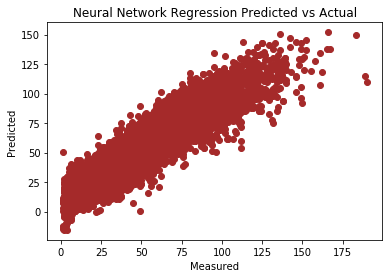

In [12]:
plt.scatter(y_test, nnr_pred,color='brown')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

In [285]:
xgb_score = mlp.score(X_test, y_test)
xgb_score

0.8669828345182262

In [15]:
from joblib import dump, load

In [1314]:
dump(mlp,str( '/home/paw/DanielBustillos/Modelos/ANN_'+str(hora)+'.joblib'))

['/home/paw/DanielBustillos/Modelos/ANN_1.joblib']

In [1315]:
clf_7

NameError: name 'clf_7' is not defined

In [1022]:
clf_12 = load('/home/paw/DanielBustillos/Modelos/ANN_12.joblib') 
clf_11 = load('/home/paw/DanielBustillos/Modelos/ANN_11.joblib') 
clf_10 = load('/home/paw/DanielBustillos/Modelos/ANN_10.joblib') 
clf_9 = load('/home/paw/DanielBustillos/Modelos/ANN_9.joblib') 
clf_8 = load('/home/paw/DanielBustillos/Modelos/ANN_8.joblib') 
clf_7 = load('/home/paw/DanielBustillos/Modelos/ANN_7.joblib') 
clf_6 = load('/home/paw/DanielBustillos/Modelos/ANN_6.joblib') 
clf_5 = load('/home/paw/DanielBustillos/Modelos/ANN_5.joblib') 
clf_4 = load('/home/paw/DanielBustillos/Modelos/ANN_4.joblib') 
clf_3 = load('/home/paw/DanielBustillos/Modelos/ANN_3.joblib') 
clf_2 = load('/home/paw/DanielBustillos/Modelos/ANN_2.joblib') 
clf_1 = load('/home/paw/DanielBustillos/Modelos/ANN_1.joblib') 

In [528]:
X_test =X_test.iloc[10:20,:]

In [530]:
pred_1 = clf_1.predict(X_test.head(1))
pred_2 = clf_2.predict(X_test.head(1))
pred_3 = clf_3.predict(X_test.head(1))
pred_4 = clf_4.predict(X_test.head(1))
pred_5 = clf_5.predict(X_test.head(1))
pred_6 = clf_6.predict(X_test.head(1))
pred_7 = clf_7.predict(X_test.head(1))
pred_8 = clf_8.predict(X_test.head(1))
pred_9 = clf_9.predict(X_test.head(1))
pred_10 = clf_10.predict(X_test.head(1))
pred_11 = clf_11.predict(X_test.head(1))
pred_12 = clf_12.predict(X_test.head(1))

In [531]:
pred =  pd.DataFrame(columns=["pred_1"])

In [532]:
    df_pred =  pd.DataFrame(columns=["pred_1"])
    df_pred["pred_1"] = pred_1
    df_pred["pred_2"] = pred_2
    df_pred["pred_3"] = pred_3
    df_pred["pred_4"] = pred_4
    df_pred["pred_5"] = pred_5
    df_pred["pred_6"] = pred_6
    df_pred["pred_7"] = pred_7
    df_pred["pred_8"] = pred_8
    df_pred["pred_9"] = pred_9
    df_pred["pred_10"] = pred_10
    df_pred["pred_11"] = pred_11
    df_pred["pred_12"] = pred_12

In [533]:
df_pred

,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10,pred_11,pred_12
0,54.957937,51.781566,57.165241,74.372459,90.542445,98.629053,89.717011,86.063499,71.769331,43.592133,30.518401,26.412203


## Linear

In [286]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression(fit_intercept=False, n_jobs=3)

In [287]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=3, normalize=False)

In [288]:
# Make predictions using the testing set
lin_pred = regr.predict(X_test)

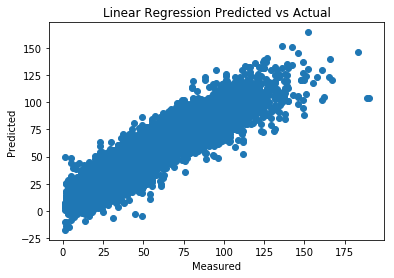

In [289]:
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

In [290]:
regr.score(X_test, y_test)

0.8601109454782563

In [360]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regr.coef_))], axis = 1)

In [1676]:
coefficients["values"] = coefficients.iloc[:,1]

# XGBoost

In [291]:
from xgboost.sklearn import XGBRegressor

In [292]:
xboost = XGBRegressor(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 1,
                      subsample = .2,
                      min_child_weight =1,
                      n_estimators=1300, #2000
                      reg_alpha = 1,
                      max_depth=2, 
                      gamma=0.1,njobs=64)#n_estimators=100, max_depth=20,learning_rate =.1,base_score=0.000003)

In [298]:
xboost = XGBRegressor( learning_rate=0.2,loss="deviance",n_estimators=1000,n_jobs=64)

In [303]:
xboost.fit(X_train, y_train)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.2, loss='deviance', max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [304]:
xgb_score = xboost.score(X_test, y_test)

In [305]:
#Predict 
xboost_pred = xboost.predict(X_test)

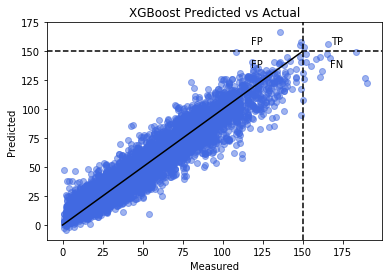

In [306]:
plt.scatter(y_test, xboost_pred,alpha=0.5,color="royalblue")
plt.axhline(y=150, color='k', linestyle='--')
plt.axvline(x=150, color='k', linestyle='--')
plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
              horizontalalignment='right')

plt.plot( [0,150],[0,150],color="k")
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('XGBoost Predicted vs Actual')
plt.show()

In [307]:
xboost.score(X_test, y_test)

0.9102040665745199

## ADA Booster applied on Random Tree Regressor

In [308]:
y_train.quantile(0.99)

127.0

In [49]:
from sklearn.ensemble import GradientBoostingRegressor 

In [310]:
gbr = GradientBoostingRegressor(n_estimators=500,learning_rate=0.0405,loss="quantile",alpha=0.913,verbose=1,min_samples_split=2,random_state=123)#,n_estimators=1000)

In [331]:
gbr = GradientBoostingRegressor(n_estimators=500,learning_rate=0.020055,loss="quantile",alpha=0.9,verbose=1,random_state=123)#,n_estimators=1000)

In [344]:
gbr = GradientBoostingRegressor(n_estimators=500,learning_rate=0.0455,loss="quantile",alpha=0.95,verbose=1,random_state=123)#,n_estimators=1000)

In [345]:
regr_fit = gbr.fit(X_train, y_train)
y_1 = gbr.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           3.5669            2.59m
         2           3.4505            2.67m
         3           3.3535            2.66m
         4           3.2617            2.65m
         5           3.1759            2.64m
         6           3.0952            2.63m
         7           3.0163            2.61m
         8           2.9428            2.57m
         9           2.8719            2.52m
        10           2.8069            2.49m
        20           2.2875            2.50m
        30           1.9348            2.60m
        40           1.6930            2.60m
        50           1.5187            2.59m
        60           1.3952            2.55m
        70           1.3080            2.52m
        80           1.2436            2.48m
        90           1.1956            2.43m
       100           1.1623            2.38m
       200           1.0471            1.62m
       300           1.0349           58.82s
       40

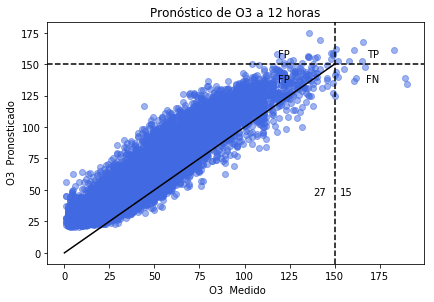

In [346]:
plt.scatter(y_test,y_1,alpha=0.5,color="royalblue")
plt.axhline(y=150, color='k', linestyle='--')
plt.axvline(x=150, color='k', linestyle='--')
plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
              horizontalalignment='right')
plt.annotate(str(len(y_1[y_1>150])), (135,65), xytext = (145, 45 + 1), 
              horizontalalignment='right')
plt.annotate(str(y_test[y_test>150].count()), (155,65), xytext = (160, 45 + 1), 
              horizontalalignment='right')
plt.plot( [0,150],[0,150],color="k")
plt.tight_layout(1.3)
plt.xlabel(' O3  Medido')
plt.ylabel(' O3  Pronosticado')
plt.title('Pronóstico de O3 a 12 horas')
#plt.savefig('/Users/danielbustillos/Desktop/temp.png', facecolor="white", edgecolor='white',transparent=True,bbox_inches="tight",dpi=600)
plt.show()

In [351]:
gbr.score(X_test, y_test)

0.9042109619525452

In [348]:
gbr = GradientBoostingRegressor(n_estimators=500,learning_rate=0.05,verbose=1,random_state=123)#,n_estimators=1000)

In [349]:
regr_fit = gbr.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1         744.5668            3.08m
         2         692.8799            3.05m
         3         646.0750            3.07m
         4         604.0558            3.10m
         5         565.3351            3.11m
         6         529.8450            3.10m
         7         497.9624            3.10m
         8         468.2143            3.08m
         9         441.2835            3.08m
        10         415.3782            3.09m
        20         250.4337            3.05m
        30         177.5437            2.97m
        40         141.8043            2.85m
        50         123.6038            2.77m
        60         113.3394            2.70m
        70         107.1416            2.60m
        80         102.9140            2.51m
        90          99.4788            2.44m
       100          96.8920            2.35m
       200          81.5217            1.71m
       300          74.3313            1.11m
       40

In [350]:
y_2 = gbr.predict(X_test)

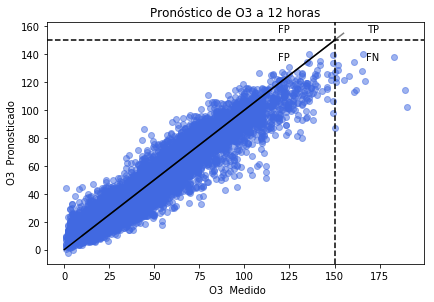

In [338]:
#y_2 = pd.DataFrame(scaler2.inverse_transform(pd.DataFrame(y_2)),columns=["O3_11_forecast"]);
#y_test_1 = pd.DataFrame(scaler2.inverse_transform(pd.DataFrame(y_test)),columns=["O3_11_forecast"]);

plt.scatter(y_test,y_2,alpha=0.5,color="royalblue")
plt.axhline(y=150, color='k', linestyle='--')
plt.axvline(x=150, color='k', linestyle='--')
plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
              horizontalalignment='right')

plt.plot( [0,150],[0,150],color="k")
plt.tight_layout(1.3)
plt.plot( [10,155],[10,155],color="k",alpha=0.5)
plt.xlabel(' O3  Medido')
plt.ylabel(' O3  Pronosticado')
plt.title('Pronóstico de O3 a 12 horas')
#plt.savefig('/Users/danielbustillos/Desktop/temp.png', facecolor="white", edgecolor='white',transparent=True,bbox_inches="tight",dpi=600)
plt.show()

In [339]:
gbr.score(X_test, y_test)

0.8983916706437615

## Random forest

In [321]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression

In [327]:
regr = RandomForestRegressor(n_estimators=500)#max_depth=10,n_estimators=1000,n_jobs=1000,min_samples_split= 10,criterion= 'mse')#max_depth=10,n_estimators=10)
regr_fit = regr.fit(X_train, y_train)

In [328]:
y_1 = regr_fit.predict(X_test)

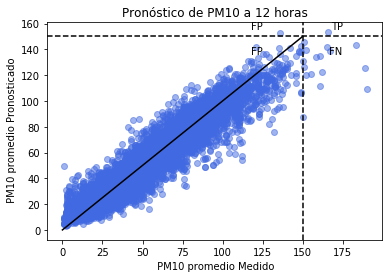

In [329]:
plt.scatter(y_test, y_1,alpha=0.5,color="royalblue")
plt.axhline(y=150, color='k', linestyle='--')
plt.axvline(x=150, color='k', linestyle='--')
plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
              horizontalalignment='right')

plt.plot( [0,150],[0,150],color="k")
plt.xlabel(' PM10 promedio Medido')
plt.ylabel(' PM10 promedio Pronosticado')
plt.title('Pronóstico de PM10 a 12 horas')
#plt.savefig('/Users/danielbustillos/Desktop/temp.png', facecolor="white", edgecolor='white',transparent=True,bbox_inches="tight",dpi=900)
plt.show()

In [330]:
regr_fit.score(X_test, y_test)

0.9023180648171292

In [42]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(regr_2.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

NameError: name 'regr_2' is not defined

In [125]:
rmse = np.sqrt(mean_squared_error(y_test, y_1))
print("RMSE: %f" % (rmse))

RMSE: 12.430150


# Guardamos los modelos

funciones:

In [26]:
def ploter(y_test_0,X_test_0,pronosticados_0,model):
    plt.scatter(y_test_0, pronosticados_0,alpha=0.5,color="royalblue")
    score = round(model.score(X_test_0, y_test_0),3)
    rmse = round(np.sqrt(mean_squared_error(y_test_0, pronosticados_0)),3)

    plt.axhline(y=150, color='k', linestyle='--')
    plt.axvline(x=150, color='k', linestyle='--')
    plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate("Score ="+str(score), (15,160), xytext = (15, 169 + 1), 
                  horizontalalignment='left')
    plt.annotate("RMSE ="+str(rmse), (15,160), xytext = (15, 159 + 1), 
                  horizontalalignment='left')


    plt.plot( [0,150],[0,150],color="k")
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.title('XGBoost Predicted vs Actual')
    plt.show()

## HORA 1 

In [4]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [5]:
hora = 1

In [6]:
dataset_1 = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset_1.dropna(inplace=True)

In [7]:
X_1 = dataset_1.loc[:, dataset_1.columns != str('O3forecast_'+str(hora))]
y_1 = dataset_1[str('O3forecast_'+str(hora))]

In [8]:
X_1.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_1.drop(lista[:hora-1],axis=1,inplace=True)
#X =  pd.DataFrame(scaler1.fit_transform(X),columns=X.columns)
#y =  pd.DataFrame(scaler2.fit_transform(pd.DataFrame(y)),columns=['O3_+11_y'])
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=123)

## Modelo

In [9]:
from xgboost.sklearn import XGBRegressor

In [10]:
model_1 = XGBRegressor(learning_rate=0.05,n_estimators=1000,n_jobs=64,random_state=123)

In [11]:
model_1.fit(X_train_1, y_train_1)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [12]:
#Predict 
O3_1 = model_1.predict(X_test_1)

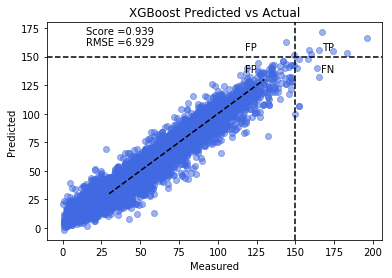

In [15]:
ploter(y_test_1,X_test_1,O3_1,model_1)

In [365]:
# and later you can load it
model_1 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_1hora.pkl')

In [366]:
model_1.predict(X_1)

array([13.143664, 15.066901, 12.2344  , ..., 67.21526 , 61.921295,
       52.403202], dtype=float32)

In [368]:
O3_forecast_1 = model_1.predict(X_1)

# HORA 2

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [71]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [72]:
hora = 2

In [73]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [74]:
X_2 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_2 = dataset[str('O3forecast_'+str(hora))]

In [75]:
X_2.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_2.drop(lista[:hora-1],axis=1,inplace=True)

In [76]:
X_2["O3_forecast_1"] = model_1.predict(X_2)

In [77]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [78]:
model_2_q = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)#,n_estimators=1000)

In [79]:
model_2_q.fit(X_train_2, y_train_2)

      Iter       Train Loss   Remaining Time 
         1           3.6451            6.55m
         2           3.6159            6.51m
         3           3.5890            6.43m
         4           3.5628            6.07m
         5           3.5359            5.82m
         6           3.5093            5.56m
         7           3.4833            5.37m
         8           3.4590            5.22m
         9           3.4339            5.10m
        10           3.4087            5.07m
        20           3.1747            5.01m
        30           2.9735            4.94m
        40           2.8005            4.87m
        50           2.6495            4.79m
        60           2.5086            4.71m
        70           2.3909            4.66m
        80           2.2781            4.64m
        90           2.1739            4.62m
       100           2.0801            4.61m
       200           1.4875            4.37m
       300           1.1805            3.99m
       40

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [84]:
O3_2_q = model_2_q.predict(X_test_2)

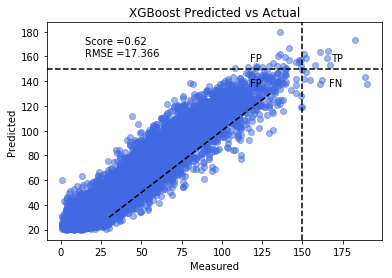

In [85]:
ploter(y_test_2,X_test_2,O3_2_q,model_2_q)

In [87]:
# and later you can load it
model_2_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_2hora_quantile.pkl')

## modelo normal

In [88]:
model_2 = XGBRegressor(learning_rate=0.05,n_estimators=1000,n_jobs=64,random_state=123)

In [89]:
model_2.fit(X_train_2, y_train_2)


/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [90]:
O3_2 = model_2.predict(X_test_2)

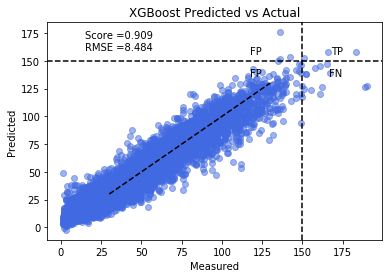

In [91]:
ploter(y_test_2,X_test_2,O3_2,model_2)

In [93]:
# and later you can load it
model_2 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_2hora.pkl')

## Hacemos una función para obtenner el -promedio- de los dos modelos

In [94]:
def predictor_mean(model0_1,modelo_2,X_set):  
    #aplicamos los predict
    forecast_q = model0_1.predict(X_set) 
    forecast = modelo_2.predict(X_set)
   #generamos una lista dummy: 
    forecast_mean = forecast 
    
    for i in range(len(X_set)):
        if  forecast[i] < 135:
            forecast_mean[i] = forecast[i]
        elif  forecast_q[i] > 160:
            forecast_mean[i] = forecast_q[i]
        if  130 < forecast_q[i] <155 and 130 < forecast[i] < 155:
            forecast_mean[i] = (0.3*forecast_q[i] + 0.7*forecast[i])
        if  140 < forecast_q[i] <160 and 140 < forecast[i] < 160:
            forecast_mean[i] = (forecast_q[i] + forecast[i])/2
    return forecast_mean

In [95]:
predict_mean = predictor_mean(model_2_q,model_2,X_test_2)

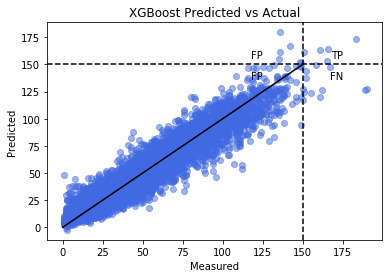

In [96]:
plt.scatter(y_test_2, predict_mean, alpha=0.5,color="royalblue")
plt.axhline(y=150, color='k', linestyle='--')
plt.axvline(x=150, color='k', linestyle='--')
plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
              horizontalalignment='right')

plt.plot( [0,150],[0,150],color="k")
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('XGBoost Predicted vs Actual')
plt.show()

# HORA 3

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [97]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [98]:
hora = 3

In [100]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [101]:
X_3 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_3 = dataset[str('O3forecast_'+str(hora))]

In [102]:
X_3.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_3.drop(lista[:hora-1],axis=1,inplace=True)

In [103]:
X_3["O3_forecast_1"] = model_1.predict(X_3)
X_3["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_3)

In [104]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=123)

## Quantile 95

In [105]:
model_3_q = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)#,n_estimators=1000

In [106]:
model_3_q.fit(X_train_3, y_train_3)

      Iter       Train Loss   Remaining Time 
         1           3.6503            5.16m
         2           3.6207            5.16m
         3           3.5920            5.15m
         4           3.5634            5.14m
         5           3.5352            5.13m
         6           3.5074            5.11m
         7           3.4799            5.09m
         8           3.4531            5.09m
         9           3.4268            5.09m
        10           3.4008            5.08m
        20           3.1616            5.01m
        30           2.9610            4.94m
        40           2.7955            4.77m
        50           2.6438            4.72m
        60           2.5125            4.69m
        70           2.3871            4.67m
        80           2.2744            4.65m
        90           2.1741            4.64m
       100           2.0834            4.60m
       200           1.4971            4.35m
       300           1.2106            3.98m
       40

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [107]:
O3_3_q = model_3_q.predict(X_test_3)

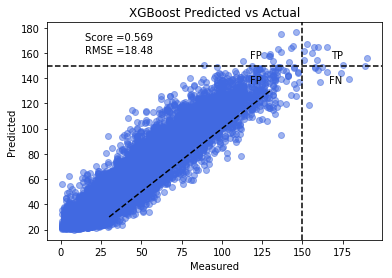

In [108]:
ploter(y_test_3,X_test_3,O3_3_q,model_3_q)

In [110]:
# and later you can load it
model_3_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_3hora_quantile.pkl')

## Modelo Normal

In [111]:
model_3 = XGBRegressor(learning_rate=0.05,n_estimators=1000,n_jobs=64,random_state=123)

In [112]:
model_3.fit(X_train_3, y_train_3)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [113]:
O3_3 = model_3.predict(X_test_3)

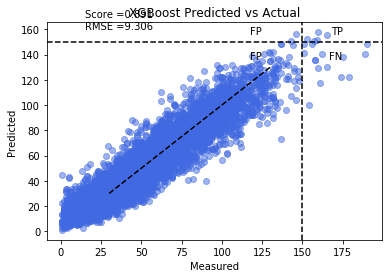

In [114]:
ploter(y_test_3,X_test_3,O3_3,model_3)

In [116]:
# and later you can load it
model_3 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_3hora.pkl')

# HORA 4

In [282]:
hora = 4

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [283]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [284]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [285]:
X_4 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_4 = dataset[str('O3forecast_'+str(hora))]

In [286]:
X_4.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_4.drop(lista[:hora-1],axis=1,inplace=True)

In [287]:
X_4["O3_forecast_1"] = model_1.predict(X_4)
X_4["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_4)
X_4["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_4)

In [288]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.2, random_state=123)

## Quantile 95

In [289]:
model_4_q = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.1,loss="quantile",alpha=0.97,verbose=1,random_state=123)#,n_estimators=1000

In [290]:
model_4_q.fit(X_train_4, y_train_4)

      Iter       Train Loss   Remaining Time 
         1           2.2863            5.65m
         2           2.1591            5.73m
         3           2.0403            5.78m
         4           1.9210            5.83m
         5           1.8171            5.85m
         6           1.7428            5.88m
         7           1.6670            5.93m
         8           1.5962            6.00m
         9           1.5344            6.02m
        10           1.4721            6.05m
        20           1.0505            6.36m
        30           0.8592            6.61m
        40           0.7712            6.57m
        50           0.7305            6.51m
        60           0.7118            6.35m
        70           0.7071            6.01m
        80           0.7035            5.67m
        90           0.6994            5.43m
       100           0.6967            5.23m
       200           0.6887            4.09m
       300           0.6887            3.43m
       40

GradientBoostingRegressor(alpha=0.97, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [291]:
O3_4_q = model_4_q.predict(X_test_4)

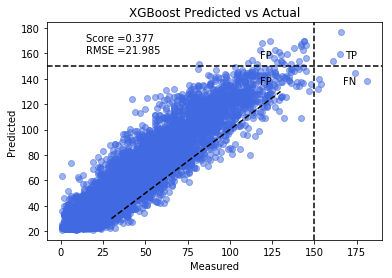

In [292]:
ploter(y_test_4,X_test_4,O3_4_q,model_4_q)

In [294]:
# and later you can load it
model_4_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_4hora_quantile.pkl')

## Modelo Normal

In [295]:
model_4 = XGBRegressor(learning_rate=0.05,n_estimators=1000,n_jobs=64,random_state=123)

In [296]:
model_4.fit(X_train_4, y_train_4)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [297]:
O3_4 = model_4.predict(X_test_4)

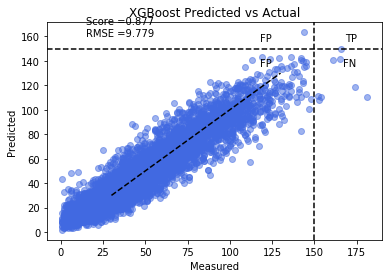

In [298]:
ploter(y_test_4,X_test_4,O3_4,model_4)

In [300]:
# and later you can load it
model_4 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_4hora.pkl')

# HORA 5

In [42]:
hora = 5

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [43]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [44]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [45]:
X_5 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_5 = dataset[str('O3forecast_'+str(hora))]

In [46]:
X_5.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_5.drop(lista[:hora-1],axis=1,inplace=True)

In [47]:
X_5["O3_forecast_1"] = model_1.predict(X_5)
X_5["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_5)
X_5["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_5)
X_5["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_5)

In [48]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.2, random_state=123)

## Quantile 95

In [49]:
model_5_q = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)#,n_estimators=1000

In [50]:
model_5_q.fit(X_train_5, y_train_5)

      Iter       Train Loss   Remaining Time 
         1           3.6474            6.15m
         2           3.6194            6.14m
         3           3.5917            6.14m
         4           3.5643            6.17m
         5           3.5372            6.17m
         6           3.5107            6.19m
         7           3.4844            6.21m
         8           3.4588            6.20m
         9           3.4335            6.21m
        10           3.4083            6.21m
        20           3.1695            5.94m
        30           2.9635            5.89m
        40           2.7931            5.88m
        50           2.6458            5.85m
        60           2.5082            5.80m
        70           2.3878            5.72m
        80           2.2726            5.71m
        90           2.1690            5.69m
       100           2.0736            5.67m
       200           1.4773            5.35m
       300           1.2084            4.86m
       40

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [51]:
O3_5_q = model_5_q.predict(X_test_5)

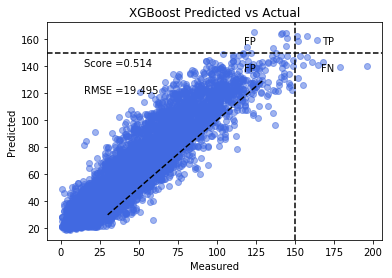

In [52]:
ploter(y_test_5,X_test_5,O3_5_q,model_5_q)

In [54]:
# and later you can load it
model_5_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_5hora_quantile.pkl')

## Modelo Normal

In [55]:
model_5 = XGBRegressor(learning_rate=0.05,n_estimators=1000,n_jobs=64,random_state=123)

In [56]:
model_5.fit(X_train_5, y_train_5)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [57]:
O3_5 = model_5.predict(X_test_5)

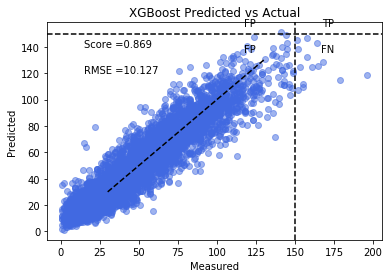

In [58]:
ploter(y_test_5,X_test_5,O3_5,model_5)

In [60]:
# and later you can load it
model_5 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_5hora.pkl')

# HORA 6

In [61]:
hora = 6

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [62]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [63]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [64]:
X_6 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_6 = dataset[str('O3forecast_'+str(hora))]

In [65]:
X_6.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_6.drop(lista[:hora-1],axis=1,inplace=True)

In [66]:
X_6["O3_forecast_1"] = model_1.predict(X_6)
X_6["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_6)
X_6["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_6)
X_6["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_6)
X_6["O3_forecast_5"]  = predictor_mean(model_5_q,model_5,X_6)

In [67]:
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y_6, test_size=0.2, random_state=123)

## Quantile 95

In [68]:
model_6_q = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.05,loss="quantile",alpha=0.96,verbose=1,random_state=123)#,n_estimators=1000

In [69]:
model_6_q.fit(X_train_6, y_train_6)

      Iter       Train Loss   Remaining Time 
         1           2.9683            6.01m
         2           2.8614            5.80m
         3           2.7614            5.63m
         4           2.6745            5.52m
         5           2.5982            5.43m
         6           2.5338            5.46m
         7           2.4555            5.60m
         8           2.3803            5.68m
         9           2.3205            5.72m
        10           2.2577            5.77m
        20           1.8022            5.95m
        30           1.4963            6.15m
        40           1.2934            6.38m
        50           1.1495            6.43m
        60           1.0601            6.52m
        70           1.0032            6.51m
        80           0.9691            6.43m
        90           0.9474            6.29m
       100           0.9267            6.23m
       200           0.8778            4.91m
       300           0.8766            3.96m
       40

GradientBoostingRegressor(alpha=0.96, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [70]:
O3_6_q = model_6_q.predict(X_test_6)

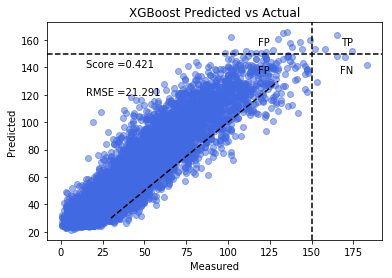

In [71]:
ploter(y_test_6,X_test_6,O3_6_q,model_6_q)

In [73]:
# and later you can load it
O3_6_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_6hora_quantile.pkl')

## Modelo Normal

In [120]:
model_6 = XGBRegressor(learning_rate=0.01,n_estimators=1000,n_jobs=64,random_state=123)

In [121]:
model_6.fit(X_train_6, y_train_6)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [122]:
O3_6 = model_6.predict(X_test_6)

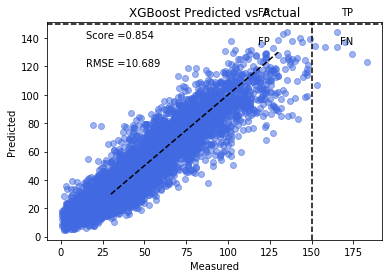

In [123]:
ploter(y_test_6,X_test_6,O3_6,model_6)

In [125]:
# and later you can load it
model_6 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_6hora.pkl')

# HORA 7

In [128]:
hora = 7

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [129]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [130]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [131]:
X_7 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_7 = dataset[str('O3forecast_'+str(hora))]

In [132]:
X_7.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_7.drop(lista[:hora-1],axis=1,inplace=True)

In [133]:
X_7["O3_forecast_1"] = model_1.predict(X_7)
X_7["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_7)
X_7["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_7)
X_7["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_7)
X_7["O3_forecast_5"]  = predictor_mean(model_5_q,model_5,X_7)
X_7["O3_forecast_6"]  = predictor_mean(model_6_q,model_6,X_7)

In [134]:
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_7, y_7, test_size=0.2, random_state=123)

## Quantile 95

In [81]:
model_7_q = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.3,loss="quantile",alpha=0.97,verbose=1,random_state=123)#,n_estimators=1000

In [82]:
model_7_q.fit(X_train_7, y_train_7)

      Iter       Train Loss   Remaining Time 
         1           2.0444            5.78m
         2           1.7716            5.95m
         3           1.5265            6.11m
         4           1.3796            6.24m
         5           1.2423            6.48m
         6           1.1435            6.58m
         7           1.0616            6.71m
         8           1.0136            6.77m
         9           0.9523            6.85m
        10           0.9174            6.90m
        20           0.7822            6.65m
        30           0.7744            5.96m
        40           0.7744            5.56m
        50           0.7744            5.28m
        60           0.7744            5.08m
        70           0.7744            4.92m
        80           0.7744            4.74m
        90           0.7744            4.63m
       100           0.7744            4.53m
       200           0.7744            3.82m
       300           0.7744            3.29m
       40

GradientBoostingRegressor(alpha=0.97, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [83]:
O3_7_q = model_7_q.predict(X_test_7)

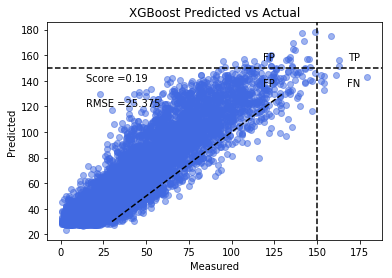

In [84]:
ploter(y_test_7,X_test_7,O3_7_q,model_7_q)

In [86]:
# and later you can load it
O3_7_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_7hora_quantile.pkl')

## Modelo Normal

In [135]:
model_7 = XGBRegressor(learning_rate=0.01,n_estimators=1000,n_jobs=64,random_state=123)

In [136]:
model_7.fit(X_train_7, y_train_7)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [138]:
O3_7 = model_7.predict(X_test_7)

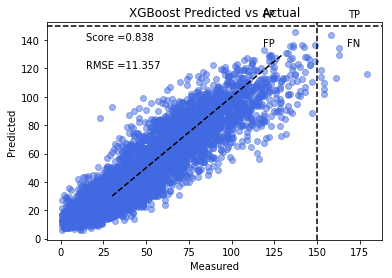

In [139]:
ploter(y_test_7,X_test_7,O3_7,model_7)

In [141]:
# and later you can load it
model_7 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_7hora.pkl')

# HORA 8

In [103]:
hora = 8

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [96]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [97]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [98]:
X_8 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_8 = dataset[str('O3forecast_'+str(hora))]

In [99]:
X_8.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_8.drop(lista[:hora-1],axis=1,inplace=True)

In [100]:
X_8["O3_forecast_1"] = model_1.predict(X_8)
X_8["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_8)
X_8["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_8)
X_8["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_8)
X_8["O3_forecast_5"]  = predictor_mean(model_5_q,model_5,X_8)
X_8["O3_forecast_6"]  = predictor_mean(model_6_q,model_6,X_8)
X_8["O3_forecast_7"]  = predictor_mean(model_7_q,model_7,X_8)

In [102]:
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(X_8, y_8, test_size=0.2, random_state=123)

## Quantile 95

In [112]:
model_8_q = GradientBoostingRegressor(n_estimators=400,learning_rate=0.01,loss="quantile",alpha=0.9,verbose=1,random_state=123)#,n_estimators=1000

In [113]:
model_8_q.fit(X_train_8, y_train_8)

      Iter       Train Loss   Remaining Time 
         1           6.0743            2.64m
         2           6.0231            2.63m
         3           5.9721            2.63m
         4           5.9234            2.62m
         5           5.8748            2.61m
         6           5.8268            2.61m
         7           5.7789            2.61m
         8           5.7316            2.56m
         9           5.6850            2.52m
        10           5.6400            2.48m
        20           5.2252            2.44m
        30           4.8640            2.41m
        40           4.5522            2.38m
        50           4.2799            2.33m
        60           4.0455            2.26m
        70           3.8341            2.21m
        80           3.6526            2.16m
        90           3.4868            2.10m
       100           3.3418            2.03m
       200           2.4430            1.43m
       300           2.1094           44.15s
       40

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=400,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [114]:
O3_8_q = model_8_q.predict(X_test_8)

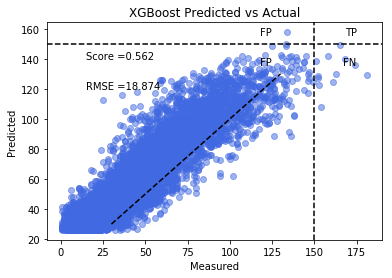

In [115]:
ploter(y_test_8,X_test_8,O3_8_q,model_8_q)

In [116]:
# now you can save it to a file
joblib.dump(model_8_q, '/home/paw/DanielBustillos/Notebooks/Modelos/O3_8hora_quantile.pkl') 

['/home/paw/DanielBustillos/Notebooks/Modelos/O3_8hora_quantile.pkl']

In [117]:
# and later you can load it
O3_8_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_8hora_quantile.pkl')

## Modelo Normal

In [119]:
model_8 = XGBRegressor(learning_rate=0.01,n_estimators=1000,n_jobs=64,random_state=123)

In [120]:
model_8.fit(X_train_8, y_train_8)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [121]:
O3_8 = model_8.predict(X_test_8)

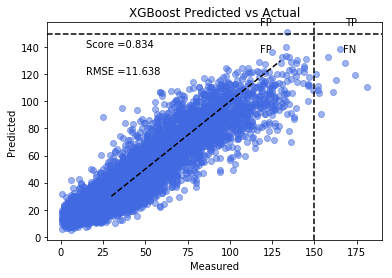

In [122]:
ploter(y_test_8,X_test_8,O3_8,model_8)

In [187]:
# and later you can load it
model_8 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_8hora.pkl')

# HORA 9

In [142]:
hora = 9

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [143]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [144]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [145]:
X_9 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_9 = dataset[str('O3forecast_'+str(hora))]

In [146]:
X_9.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_9.drop(lista[:hora-1],axis=1,inplace=True)

In [147]:
X_9["O3_forecast_1"] = model_1.predict(X_9)
X_9["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_9)
X_9["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_9)
X_9["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_9)
X_9["O3_forecast_5"]  = predictor_mean(model_5_q,model_5,X_9)
X_9["O3_forecast_6"]  = predictor_mean(model_6_q,model_6,X_9)
X_9["O3_forecast_7"]  = predictor_mean(model_7_q,model_7,X_9)
X_9["O3_forecast_8"]  = predictor_mean(model_8_q,model_8,X_9)

In [148]:
X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X_9, y_9, test_size=0.2, random_state=123)

## Quantile 95

In [176]:
model_9_q = GradientBoostingRegressor(n_estimators=700,learning_rate=0.05,loss="quantile",alpha=0.93,verbose=1,random_state=123)#,n_estimators=1000

In [177]:
model_9_q.fit(X_train_9, y_train_9)

      Iter       Train Loss   Remaining Time 
         1           4.5507            3.88m
         2           4.3791            3.87m
         3           4.2217            3.92m
         4           4.0736            4.07m
         5           3.9436            4.18m
         6           3.8075            4.25m
         7           3.6841            4.30m
         8           3.5675            4.33m
         9           3.4650            4.36m
        10           3.3750            4.38m
        20           2.6517            4.54m
        30           2.2336            4.66m
        40           1.9676            4.72m
        50           1.7946            4.69m
        60           1.6808            4.68m
        70           1.6108            4.64m
        80           1.5654            4.56m
        90           1.5356            4.47m
       100           1.5184            4.34m
       200           1.4572            3.18m
       300           1.4525            2.33m
       40

GradientBoostingRegressor(alpha=0.93, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=700,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [178]:
O3_9_q = model_9_q.predict(X_test_9)

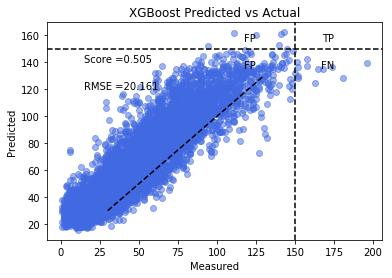

In [179]:
ploter(y_test_9,X_test_9,O3_9_q,model_9_q)

In [181]:
# and later you can load it
O3_9_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_9hora_quantile.pkl')

## Modelo Normal

In [184]:
model_9 = XGBRegressor(learning_rate=0.01,n_estimators=1000,n_jobs=64,random_state=123)

In [185]:
model_9.fit(X_train_9, y_train_9)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [192]:
O3_9 = model_9.predict(X_test_9)

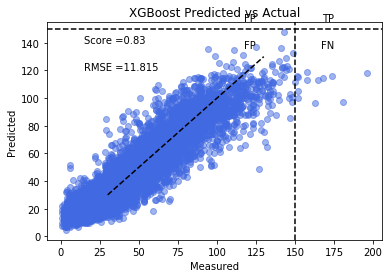

In [193]:
ploter(y_test_9,X_test_9,O3_9,model_9)

In [191]:
# and later you can load it
model_9 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_9hora.pkl')

# HORA 10

In [194]:
hora = 10

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [198]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [199]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [200]:
X_10 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_10 = dataset[str('O3forecast_'+str(hora))]

In [201]:
X_10.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_10.drop(lista[:hora-1],axis=1,inplace=True)

In [202]:
X_10["O3_forecast_1"] = model_1.predict(X_10)
X_10["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_10)
X_10["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_10)
X_10["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_10)
X_10["O3_forecast_5"]  = predictor_mean(model_5_q,model_5,X_10)
X_10["O3_forecast_6"]  = predictor_mean(model_6_q,model_6,X_10)
X_10["O3_forecast_7"]  = predictor_mean(model_7_q,model_7,X_10)
X_10["O3_forecast_8"]  = predictor_mean(model_8_q,model_8,X_10)
X_10["O3_forecast_9"]  = predictor_mean(model_9_q,model_9,X_10)

In [203]:
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y_10, test_size=0.2, random_state=123)

## Quantile 95

In [234]:
model_10_q = GradientBoostingRegressor(n_estimators=300,learning_rate=0.5 ,loss="quantile",alpha=0.97,verbose=1,random_state=123)#,n_estimators=1000

In [235]:
model_10_q.fit(X_train_10, y_train_10)

      Iter       Train Loss   Remaining Time 
         1           1.8433            2.34m
         2           1.4348            2.50m
         3           1.2392            2.63m
         4           1.1079            2.65m
         5           1.0088            2.66m
         6           0.9726            2.62m
         7           0.9327            2.55m
         8           0.9028            2.48m
         9           0.8830            2.41m
        10           0.8694            2.34m
        20           0.8384            1.83m
        30           0.8384            1.61m
        40           0.8384            1.48m
        50           0.8384            1.38m
        60           0.8348            1.29m
        70           0.8305            1.22m
        80           0.8305            1.14m
        90           0.8305            1.08m
       100           0.8285            1.03m
       200           0.8092           29.71s
       300           0.8074            0.00s


GradientBoostingRegressor(alpha=0.97, criterion='friedman_mse', init=None,
             learning_rate=0.5, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=300,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [236]:
O3_10_q = model_10_q.predict(X_test_10)

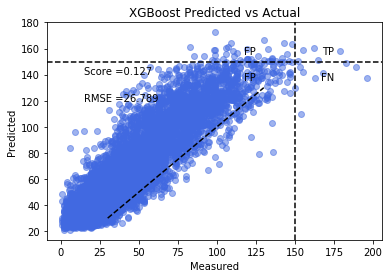

In [237]:
ploter(y_test_10,X_test_10,O3_10_q,model_10_q)

In [239]:
# and later you can load it
O3_10_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_10hora_quantile.pkl')

## Modelo Normal

In [246]:
model_10 = XGBRegressor(learning_rate=0.1,n_estimators=300,n_jobs=64,random_state=123)

In [247]:
model_10.fit(X_train_10, y_train_10)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [248]:
O3_10 = model_10.predict(X_test_10)

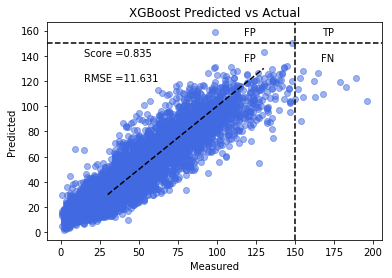

In [249]:
ploter(y_test_10,X_test_10,O3_10,model_10)

In [339]:
# and later you can load it
model_10 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_10hora.pkl')

# HORA 11

In [333]:
hora = 11

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [334]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [335]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [336]:
X_11 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_11 = dataset[str('O3forecast_'+str(hora))]

In [337]:
X_11.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_11.drop(lista[:hora-1],axis=1,inplace=True)

In [338]:
X_11["O3_forecast_1"] = model_1.predict(X_11)
X_11["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_11)
X_11["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_11)
X_11["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_11)
X_11["O3_forecast_5"]  = predictor_mean(model_5_q,model_5,X_11)
X_11["O3_forecast_6"]  = predictor_mean(model_6_q,model_6,X_11)
X_11["O3_forecast_7"]  = predictor_mean(model_7_q,model_7,X_11)
X_11["O3_forecast_8"]  = predictor_mean(model_8_q,model_8,X_11)
X_11["O3_forecast_9"]  = predictor_mean(model_9_q,model_9,X_11)
X_11["O3_forecast_10"]  = predictor_mean(model_10_q,model_10,X_11)

In [265]:
X_train_11, X_test_11, y_train_11, y_test_11 = train_test_split(X_11, y_11, test_size=0.2, random_state=123)

## Quantile 95

In [301]:
model_11_q = GradientBoostingRegressor(n_estimators=500,learning_rate=0.1 ,loss="quantile",alpha=0.95,verbose=1,random_state=123)#,n_estimators=1000

In [302]:
model_11_q.fit(X_train_11, y_train_11)

      Iter       Train Loss   Remaining Time 
         1           3.3909            3.56m
         2           3.1479            3.57m
         3           2.9432            3.43m
         4           2.7682            3.23m
         5           2.6118            3.13m
         6           2.4765            3.06m
         7           2.3556            3.06m
         8           2.2545            3.06m
         9           2.1646            3.09m
        10           2.0759            3.12m
        20           1.5363            3.33m
        30           1.3112            3.39m
        40           1.2182            3.35m
        50           1.1756            3.23m
        60           1.1527            3.09m
        70           1.1430            2.94m
        80           1.1403            2.77m
        90           1.1378            2.62m
       100           1.1358            2.48m
       200           1.1350            1.65m
       300           1.1350            1.05m
       40

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [303]:
O3_11_q = model_11_q.predict(X_test_11)

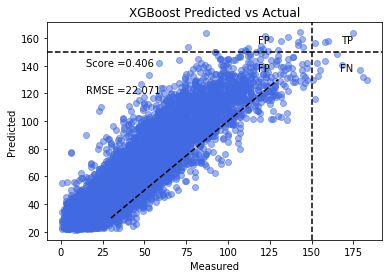

In [304]:
ploter(y_test_11,X_test_11,O3_11_q,model_11_q)

In [340]:
# and later you can load it
O3_11_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_11hora_quantile.pkl')

## Modelo Normal

In [315]:
model_11 = GradientBoostingRegressor(n_estimators=100,learning_rate=0.01,verbose=1,random_state=123)#,n_estimators=1000

In [319]:
model_11 = XGBRegressor(learning_rate=0.1,n_estimators=300,n_jobs=64,random_state=123)

In [320]:
model_11.fit(X_train_11, y_train_11)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [321]:
O3_11 = model_11.predict(X_test_11)

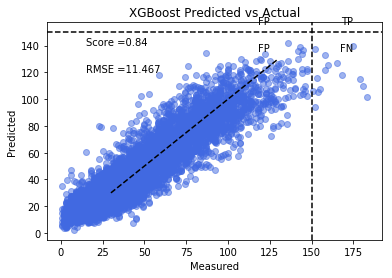

In [401]:
ploter(y_test_11,X_test_11,O3_11,model_11)

In [324]:
# and later you can load it
model_11 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_11hora.pkl')

# HORA 12

In [595]:
hora = 12

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [596]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [597]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [598]:
X_12 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_12 = dataset[str('O3forecast_'+str(hora))]

In [599]:
X_12.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_12.drop(lista[:hora-1],axis=1,inplace=True)

In [600]:
X_12["O3_forecast_1"] = model_1.predict(X_12)
X_12["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_12)
X_12["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_12)
X_12["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_12)
X_12["O3_forecast_5"]  = predictor_mean(model_5_q,model_5,X_12)
X_12["O3_forecast_6"]  = predictor_mean(model_6_q,model_6,X_12)
X_12["O3_forecast_7"]  = predictor_mean(model_7_q,model_7,X_12)
X_12["O3_forecast_8"]  = predictor_mean(model_8_q,model_8,X_12)
X_12["O3_forecast_9"]  = predictor_mean(model_9_q,model_9,X_12)
X_12["O3_forecast_10"]  = predictor_mean(model_10_q,model_10,X_12)
X_12["O3_forecast_11"]  = predictor_mean(model_11_q,model_11,X_12)

In [363]:
X_train_12, X_test_12, y_train_12, y_test_12 = train_test_split(X_12, y_12, test_size=0.2, random_state=123)

## Quantile 95

In [390]:
model_12_q = GradientBoostingRegressor(n_estimators=50,learning_rate=0.5 ,loss="quantile",alpha=0.9,verbose=1,random_state=123)#,n_estimators=1000

In [391]:
model_12_q.fit(X_train_12, y_train_12)

      Iter       Train Loss   Remaining Time 
         1           3.9661           17.13s
         2           3.0967           17.82s
         3           2.6003           19.06s
         4           2.3013           19.30s
         5           2.1707           19.64s
         6           2.1028           19.67s
         7           2.0610           18.93s
         8           2.0258           18.76s
         9           2.0085           17.99s
        10           2.0008           17.11s
        20           1.9177           12.39s
        30           1.8613            8.15s
        40           1.8484            3.88s
        50           1.8468            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.5, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, presort='auto',
             random_state=123, subsample=1.0, verbose=1, warm_start=False)

In [392]:
O3_12_q = model_12_q.predict(X_test_12)

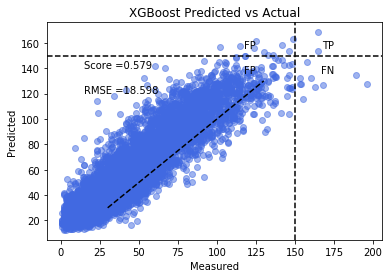

In [393]:
ploter(y_test_12,X_test_12,O3_12_q,model_12_q)

In [396]:
# and later you can load it
O3_12_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_12hora_quantile.pkl')

## Modelo Normal

In [406]:
model_12 = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,verbose=1,random_state=123)#,n_estimators=1000

In [410]:
model_12 = XGBRegressor(learning_rate=0.1,n_estimators=300,n_jobs=64,random_state=123)

In [411]:
model_12.fit(X_train_12, y_train_12)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [412]:
O3_12 = model_12.predict(X_test_12)

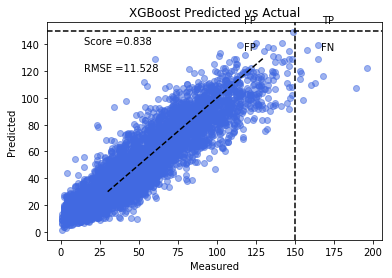

In [413]:
ploter(y_test_12,X_test_12,O3_12,model_12)

In [415]:
# and later you can load it
model_12 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_12hora.pkl')

# HORA 13

In [617]:
hora = 13

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [618]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [619]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [620]:
X_13 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_13 = dataset[str('O3forecast_'+str(hora))]

In [621]:
X_13.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_13.drop(lista[:hora-1],axis=1,inplace=True)

In [622]:
X_13["O3_forecast_1"] = model_1.predict(X_13)
X_13["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_13)
X_13["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_13)
X_13["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_13)
X_13["O3_forecast_5"]  = predictor_mean(model_5_q,model_5,X_13)
X_13["O3_forecast_6"]  = predictor_mean(model_6_q,model_6,X_13)
X_13["O3_forecast_7"]  = predictor_mean(model_7_q,model_7,X_13)
X_13["O3_forecast_8"]  = predictor_mean(model_8_q,model_8,X_13)
X_13["O3_forecast_9"]  = predictor_mean(model_9_q,model_9,X_13)
X_13["O3_forecast_10"]  = predictor_mean(model_10_q,model_10,X_13)
X_13["O3_forecast_11"]  = predictor_mean(model_11_q,model_11,X_13)
X_13["O3_forecast_12"]  = predictor_mean(model_12_q,model_12,X_13)

# data_hour_merge_14

In [623]:
lista1 = ['O3forecast_24','O3forecast_23','O3forecast_22','O3forecast_21','O3forecast_20','O3forecast_19',
         'O3forecast_18','O3forecast_17','O3forecast_16','O3forecast_15','O3forecast_14',
         'O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista1 = lista[::-1]
lista1 = lista

In [624]:
dataset_14 = data_hour_merge_14.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset_14.dropna(inplace=True)

In [625]:
X_13 = dataset_14.loc[:, dataset_14.columns != str('O3forecast_'+str(hora))]
y_13 = dataset_14[str('O3forecast_'+str(hora))]

In [626]:
X_13.drop(lista1[hora:],axis=1,inplace=True)
if hora != 1:
    X_13.drop(lista1[:hora-1],axis=1,inplace=True)

In [627]:
X_train_13, X_test_13, y_train_13, y_test_13 = train_test_split(X_13, y_13, test_size=0.2, random_state=123)

## Quantile 95

In [542]:
model_13_q = GradientBoostingRegressor(n_estimators=200,learning_rate=0.5 
                                       ,loss="quantile",alpha=0.9,verbose=1,random_state=123)#,n_estimators=1000

In [543]:
model_13_q.fit(X_train_13, y_train_13)

      Iter       Train Loss   Remaining Time 
         1           4.2261            1.44m
         2           3.3985            1.44m
         3           2.9292            1.49m
         4           2.6907            1.54m
         5           2.5787            1.54m
         6           2.5250            1.53m
         7           2.4755            1.54m
         8           2.4418            1.55m
         9           2.4161            1.53m
        10           2.3905            1.54m
        20           2.2865            1.33m
        30           2.2261            1.20m
        40           2.1706            1.12m
        50           2.1353            1.05m
        60           2.1068           57.45s
        70           2.1064           51.21s
        80           2.1064           45.82s
        90           2.1063           40.92s
       100           2.1063           36.48s
       200           2.1059            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.5, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [544]:
O3_13_q = model_13_q.predict(X_test_13)

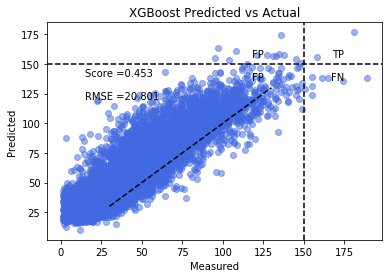

In [545]:
ploter(y_test_13,X_test_13,O3_13_q,model_13_q)

In [547]:
# and later you can load it
O3_13_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_13hora_quantile.pkl')

## Modelo Normal

In [548]:
model_13 = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,verbose=1,random_state=123)#,n_estimators=1000

In [549]:
model_13 = XGBRegressor(learning_rate=0.1,n_estimators=300,n_jobs=64,random_state=123)

In [550]:
model_13.fit(X_train_13, y_train_13)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [551]:
O3_13 = model_13.predict(X_test_13)

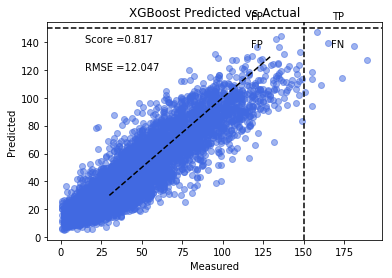

In [552]:
ploter(y_test_13,X_test_13,O3_13,model_13)

In [554]:
# and later you can load it
model_13 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_13hora.pkl')

# HORA 14

In [706]:
hora = 13

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [707]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [708]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [709]:
X_14 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_14 = dataset[str('O3forecast_'+str(hora))]

In [710]:
X_14.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_14.drop(lista[:hora-1],axis=1,inplace=True)

In [711]:
data_hour_merge_14["O3_forecast_1"] = model_1.predict(X_14)
X_14["O3_forecast_1"] = data_hour_merge_14["O3_forecast_1"] 
data_hour_merge_14["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_14)
X_14["O3_forecast_2"] = data_hour_merge_14["O3_forecast_2"] 
data_hour_merge_14["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_14)
X_14["O3_forecast_3"] = data_hour_merge_14["O3_forecast_3"] 

data_hour_merge_14["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_14)
X_14["O3_forecast_4"] = data_hour_merge_14["O3_forecast_4"] 

data_hour_merge_14["O3_forecast_5"]  = predictor_mean(model_5_q,model_5,X_14)
X_14["O3_forecast_5"] = data_hour_merge_14["O3_forecast_5"] 

data_hour_merge_14["O3_forecast_6"]  = predictor_mean(model_6_q,model_6,X_14)
X_14["O3_forecast_6"] = data_hour_merge_14["O3_forecast_6"] 

data_hour_merge_14["O3_forecast_7"]  = predictor_mean(model_7_q,model_7,X_14)
X_14["O3_forecast_7"] = data_hour_merge_14["O3_forecast_7"] 

data_hour_merge_14["O3_forecast_8"]  = predictor_mean(model_8_q,model_8,X_14)
X_14["O3_forecast_8"] = data_hour_merge_14["O3_forecast_8"] 

data_hour_merge_14["O3_forecast_9"]  = predictor_mean(model_9_q,model_9,X_14)
X_14["O3_forecast_9"] = data_hour_merge_14["O3_forecast_9"] 

data_hour_merge_14["O3_forecast_10"]  = predictor_mean(model_10_q,model_10,X_14)
X_14["O3_forecast_10"] = data_hour_merge_14["O3_forecast_10"] 

data_hour_merge_14["O3_forecast_11"]  = predictor_mean(model_11_q,model_11,X_14)
X_14["O3_forecast_11"] = data_hour_merge_14["O3_forecast_11"] 

data_hour_merge_14["O3_forecast_12"]  = predictor_mean(model_12_q,model_12,X_14)
X_14["O3_forecast_12"] = data_hour_merge_14["O3_forecast_12"] 


# data_hour_merge_14

In [716]:
hora=14

In [717]:
lista1 = ['O3forecast_24','O3forecast_23','O3forecast_22','O3forecast_21','O3forecast_20','O3forecast_19',
         'O3forecast_18','O3forecast_17','O3forecast_16','O3forecast_15','O3forecast_14',
         'O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista1 = lista[::-1]
lista1 = lista

In [718]:
dataset_14 = data_hour_merge_14.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset_14.dropna(inplace=True)

In [720]:
X_14 = dataset_14.loc[:, dataset_14.columns != str('O3forecast_'+str(hora))]

In [724]:
data_hour_merge_14["O3forecast_16"]

KeyError: 'O3forecast_16'

In [721]:
y_14 = dataset_14[str('O3forecast_'+str(hora))]

KeyError: 'O3forecast_14'

In [ ]:
X_14.drop(lista1[hora:],axis=1,inplace=True)
if hora != 1:
    X_14.drop(lista1[:hora-1],axis=1,inplace=True)

In [700]:
X_14["O3_forecast_13"] = predictor_mean(model_13_q,model_13,X_14)

ValueError: Number of features of the model must match the input. Model n_features is 269 and input n_features is 281 

In [693]:
X_train_14, X_test_14, y_train_14, y_test_14 = train_test_split(X_14, y_14, test_size=0.2, random_state=123)

# data_hour_merge_14

## Quantile 95

In [694]:
model_14_q = GradientBoostingRegressor(n_estimators=200,learning_rate=0.5 
                                       ,loss="quantile",alpha=0.9,verbose=1,random_state=123)#,n_estimators=1000

In [695]:
model_14_q.fit(X_train_14, y_train_14)

      Iter       Train Loss   Remaining Time 
         1           4.2041            1.61m
         2           3.3735            1.64m
         3           2.9164            1.67m
         4           2.6843            1.68m
         5           2.5573            1.70m
         6           2.4927            1.67m
         7           2.4428            1.65m
         8           2.4218            1.61m
         9           2.4012            1.62m
        10           2.3785            1.61m
        20           2.2517            1.42m
        30           2.1865            1.27m
        40           2.1389            1.18m
        50           2.1162            1.08m
        60           2.0957           59.32s
        70           2.0956           53.19s
        80           2.0955           47.48s
        90           2.0954           42.66s
       100           2.0954           38.11s
       200           2.0927            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.5, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [696]:
O3_14_q = model_14_q.predict(X_test_14)

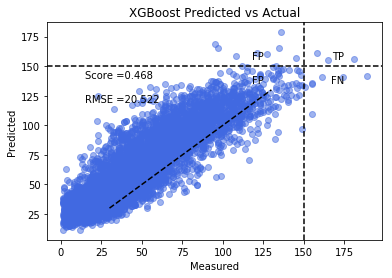

In [697]:
ploter(y_test_14,X_test_14,O3_14_q,model_14_q)

In [699]:
# and later you can load it
O3_14_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_14hora_quantile.pkl')

## Modelo Normal

In [191]:
model_14 = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,verbose=1,random_state=123)#,n_estimators=1000

In [196]:
model_14 = XGBRegressor(learning_rate=0.1,n_estimators=300,n_jobs=64,random_state=123)

In [197]:
model_14.fit(X_train_14, y_train_14)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [198]:
O3_14 = model_14.predict(X_test_14)

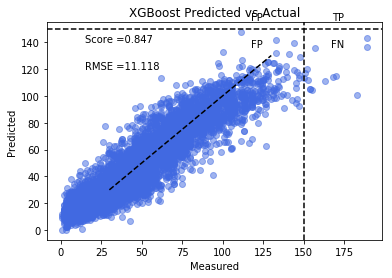

In [199]:
ploter(y_test_14,X_test_14,O3_14,model_14)

In [329]:
# and later you can load it
model_14 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_14hora.pkl')

# HORA 15

In [437]:
hora = 15

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [438]:
lista = ['O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [439]:
lista = ['O3forecast_24','O3forecast_23','O3forecast_22','O3forecast_21','O3forecast_20','O3forecast_19',
         'O3forecast_18','O3forecast_17','O3forecast_16','O3forecast_15','O3forecast_14',
         'O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [440]:
data_hour_merge = pd.read_csv("/home/paw/DanielBustillos/contaminación_24mayo/datos_modelos.csv")
data_hour_merge = data_hour_merge.iloc[:,1:]

In [441]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [442]:
dataset["O3forecast_24"] = dataset.O3_y.shift(24)
dataset["O3forecast_23"] = dataset.O3_y.shift(23)
dataset["O3forecast_22"] = dataset.O3_y.shift(22)
dataset["O3forecast_21"] = dataset.O3_y.shift(21)
dataset["O3forecast_20"] = dataset.O3_y.shift(20)
dataset["O3forecast_19"] = dataset.O3_y.shift(19)
dataset["O3forecast_18"] = dataset.O3_y.shift(18)
dataset["O3forecast_17"] = dataset.O3_y.shift(17)
dataset["O3forecast_16"] = dataset.O3_y.shift(16)
dataset["O3forecast_15"] = dataset.O3_y.shift(15)
dataset["O3forecast_14"] = dataset.O3_y.shift(14)
dataset["O3forecast_13"] = dataset.O3_y.shift(13)

In [443]:
dataset["O3forecast_14"] = dataset.O3_y.shift(14)

In [444]:
X_15 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_15 = dataset[str('O3forecast_'+str(hora))]

In [445]:
X_15.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_15.drop(lista[:hora-1],axis=1,inplace=True)

In [446]:
X_15["O3_forecast_1"] = model_1.predict(X_15)
X_15["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_15)
X_15["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_15)
X_15["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_15)
X_15["O3_forecast_5"]  = predictor_mean(model_5_q,model_5,X_15)
X_15["O3_forecast_6"]  = predictor_mean(model_6_q,model_6,X_15)
X_15["O3_forecast_7"]  = predictor_mean(model_7_q,model_7,X_15)
X_15["O3_forecast_8"]  = predictor_mean(model_8_q,model_8,X_15)
X_15["O3_forecast_9"]  = predictor_mean(model_9_q,model_9,X_15)
X_15["O3_forecast_10"]  = predictor_mean(model_10_q,model_10,X_15)
X_15["O3_forecast_11"]  = predictor_mean(model_11_q,model_11,X_15)
X_15["O3_forecast_12"]  = predictor_mean(model_12_q,model_12,X_15)
X_15["O3_forecast_13"]  = predictor_mean(model_13_q,model_13,X_15)

In [447]:
dataset["RHforecast_24"] = data_hour_merge.RH.shift(24)
dataset["RHforecast_24"] = data_hour_merge.RH.shift(23)
dataset["RHforecast_22"] = data_hour_merge.RH.shift(22)
dataset["RHforecast_21"] = data_hour_merge.RH.shift(21)
dataset["RHforecast_20"] = data_hour_merge.RH.shift(20)
dataset["RHforecast_19"] = data_hour_merge.RH.shift(19)
dataset["RHforecast_18"] = data_hour_merge.RH.shift(18)
dataset["RHforecast_17"] = data_hour_merge.RH.shift(17)
dataset["RHforecast_16"] = data_hour_merge.RH.shift(16)
dataset["RHforecast_15"] = data_hour_merge.RH.shift(15)
dataset["RHforecast_14"] = data_hour_merge.RH.shift(14)
dataset["RHforecast_13"] = data_hour_merge.RH.shift(13)

dataset["WSPforecast_24"] = data_hour_merge.WSP.shift(24)
dataset["WSPforecast_23"] = data_hour_merge.WSP.shift(22)
dataset["WSPforecast_22"] = data_hour_merge.WSP.shift(22)
dataset["WSPforecast_21"] = data_hour_merge.WSP.shift(21)
dataset["WSPforecast_20"] = data_hour_merge.WSP.shift(20)
dataset["WSPforecast_19"] = data_hour_merge.WSP.shift(19)
dataset["WSPforecast_18"] = data_hour_merge.WSP.shift(18)
dataset["WSPforecast_17"] = data_hour_merge.WSP.shift(17)
dataset["WSPforecast_16"] = data_hour_merge.WSP.shift(16)
dataset["WSPforecast_15"] = data_hour_merge.WSP.shift(15)
dataset["WSPforecast_14"] = data_hour_merge.WSP.shift(14)
dataset["WSPforecast_13"] = data_hour_merge.WSP.shift(13)

dataset["TMPforecast_24"] = data_hour_merge.TMP.shift(24)
dataset["TMPforecast_23"] = data_hour_merge.TMP.shift(23)
dataset["TMPforecast_22"] = data_hour_merge.TMP.shift(22)
dataset["TMPforecast_21"] = data_hour_merge.TMP.shift(21)
dataset["TMPforecast_20"] = data_hour_merge.TMP.shift(20)
dataset["TMPforecast_19"] = data_hour_merge.TMP.shift(19)
dataset["TMPforecast_18"] = data_hour_merge.TMP.shift(18)
dataset["TMPforecast_17"] = data_hour_merge.TMP.shift(17)
dataset["TMPforecast_16"] = data_hour_merge.TMP.shift(16)
dataset["TMPforecast_15"] = data_hour_merge.TMP.shift(15)
dataset["TMPforecast_14"] = data_hour_merge.TMP.shift(14)
dataset["TMPforecast_13"] = data_hour_merge.TMP.shift(13)

In [448]:
dataset = dataset.dropna()

In [449]:
X_15 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_15 = dataset[str('O3forecast_'+str(hora))]

In [450]:
X_15.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_15.drop(lista[:hora-1],axis=1,inplace=True)

In [451]:
X_15["O3_forecast_14"]  = predictor_mean(model_14_q,model_14,X_15)

In [467]:
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(X_15, y_15, test_size=0.2, random_state=123)

## Quantile 95

In [377]:
model_15_q = GradientBoostingRegressor(n_estimators=200,learning_rate=0.1 
                                       ,loss="quantile",alpha=0.9,verbose=1,random_state=123)#,n_estimators=1000

In [378]:
model_15_q.fit(X_train_15, y_train_15)

      Iter       Train Loss   Remaining Time 
         1           5.6202            1.44m
         2           5.1994            1.41m
         3           4.8198            1.40m
         4           4.4956            1.41m
         5           4.2184            1.40m
         6           3.9753            1.40m
         7           3.7775            1.40m
         8           3.5781            1.40m
         9           3.4158            1.41m
        10           3.2799            1.40m
        20           2.3936            1.41m
        30           2.0976            1.37m
        40           1.9966            1.28m
        50           1.9549            1.17m
        60           1.9323            1.06m
        70           1.9195           57.19s
        80           1.9064           51.47s
        90           1.8980           45.93s
       100           1.8931           40.86s
       200           1.8570            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [379]:
O3_15_q = model_15_q.predict(X_test_15)

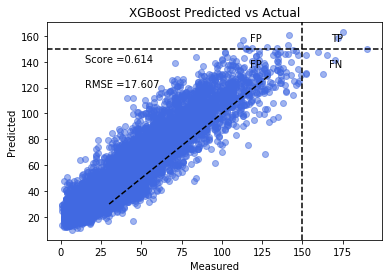

In [380]:
ploter(y_test_15,X_test_15,O3_15_q,model_15_q)

In [383]:
# and later you can load it
O3_15_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_15hora_quantile.pkl')

## Modelo Normal

In [191]:
model_14 = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,verbose=1,random_state=123)#,n_estimators=1000

In [384]:
model_15 = XGBRegressor(learning_rate=0.1,n_estimators=300,n_jobs=64,random_state=123)

In [385]:
model_15.fit(X_train_15, y_train_15)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [386]:
O3_15 = model_15.predict(X_test_15)

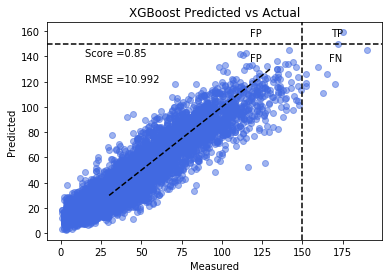

In [387]:
ploter(y_test_15,X_test_15,O3_15,model_15)

In [389]:
# and later you can load it
model_15 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_15hora.pkl')

# HORA 16

In [468]:
hora = 16

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [506]:
lista = ['O3forecast_14','O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [488]:
lista = ['O3forecast_24','O3forecast_23','O3forecast_22','O3forecast_21','O3forecast_20','O3forecast_19',
         'O3forecast_18','O3forecast_17','O3forecast_16','O3forecast_15','O3forecast_14',
         'O3forecast_13','O3forecast_12', 'O3forecast_11', 'O3forecast_10',
       'O3forecast_9', 'O3forecast_8', 'O3forecast_7', 'O3forecast_6',
       'O3forecast_5', 'O3forecast_4', 'O3forecast_3', 'O3forecast_2',
       'O3forecast_1']
lista = lista[::-1]
lista = lista

In [507]:
data_hour_merge = pd.read_csv("/home/paw/DanielBustillos/contaminación_24mayo/datos_modelos.csv")
data_hour_merge = data_hour_merge.iloc[:,1:]

In [508]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [509]:
dataset["O3forecast_24"] = dataset.O3_y.shift(24)
dataset["O3forecast_23"] = dataset.O3_y.shift(23)
dataset["O3forecast_22"] = dataset.O3_y.shift(22)
dataset["O3forecast_21"] = dataset.O3_y.shift(21)
dataset["O3forecast_20"] = dataset.O3_y.shift(20)
dataset["O3forecast_19"] = dataset.O3_y.shift(19)
dataset["O3forecast_18"] = dataset.O3_y.shift(18)
dataset["O3forecast_17"] = dataset.O3_y.shift(17)
dataset["O3forecast_16"] = dataset.O3_y.shift(16)
dataset["O3forecast_15"] = dataset.O3_y.shift(15)
dataset["O3forecast_14"] = dataset.O3_y.shift(14)
dataset["O3forecast_13"] = dataset.O3_y.shift(13)

In [510]:
X_16 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_16 = dataset[str('O3forecast_'+str(hora))]

In [511]:
X_16.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_16.drop(lista[:hora-1],axis=1,inplace=True)

In [512]:
dataset["O3_forecast_1"] = model_1.predict(X_16)
dataset["O3_forecast_2"]  = predictor_mean(model_2_q,model_2,X_16)
dataset["O3_forecast_3"]  = predictor_mean(model_3_q,model_3,X_16)
dataset["O3_forecast_4"]  = predictor_mean(model_4_q,model_4,X_16)
dataset["O3_forecast_5"]  = predictor_mean(model_5_q,model_5,X_16)
dataset["O3_forecast_6"]  = predictor_mean(model_6_q,model_6,X_16)
dataset["O3_forecast_7"]  = predictor_mean(model_7_q,model_7,X_16)
dataset["O3_forecast_8"]  = predictor_mean(model_8_q,model_8,X_16)
dataset["O3_forecast_9"]  = predictor_mean(model_9_q,model_9,X_16)
dataset["O3_forecast_10"]  = predictor_mean(model_10_q,model_10,X_16)
dataset["O3_forecast_11"]  = predictor_mean(model_11_q,model_11,X_16)
dataset["O3_forecast_12"]  = predictor_mean(model_12_q,model_12,X_16)
dataset["O3_forecast_13"]  = predictor_mean(model_13_q,model_13,X_16)

ValueError: feature_names mismatch: ['PM10_1_x1', 'TMP_1_x', 'PM1_min_2', 'CO_1_y', 'RHforecast_3', 'hora_x', 'WSP6_x', 'SO2_30_x', 'NO_x', 'WSP1_x', 'RH_24_y', 'PM1_min_1', 'WSP2_y', 'TMP_47', 'SO2_24', 'temp_1', 'O3_4', 'TMPforecast_3', 'PM10_1_y', 'PM1_1', 'RHforecast_11', 'temp_1_x', 'TMP_2_y', 'RHforecast_4', 'SO2_y', 'WSP11', 'WSPforecast_12', 'O3_2_y', 'RH_2', 'WSP4_x', 'SO2_1_x', 'O3_22_y', 'RHforecast_12', 'WSPforecast_11', 'PM10_x', 'O3_y', 'RHforecast_1', 'TMP_1', 'RH_24_2_x', 'WSP10_y', 'SO2_24_x', 'SO2_2_y', 'RH_x', 'RH_2_x', 'WSP12_y', 'PM10_3_a_x', 'O3_24', 'PM10_max_1', 'TMP_3_y', 'PM10_max_3', 'RH_3', 'PM10_1_a_x', 'PMPM10_2_y', 'O3_35_x', 'PM10_2', 'TMPforecast_4', 'RHforecast_10', 'O3_3_x', 'O3_3_y', 'CO_y', 'PM1_2', 'WSP7', 'PM1_min_2_x', 'CO_x', 'WSP6_y', 'NO', 'RH_34_x', 'PM1_1_x', 'WSP5_x', 'TMP_23_y', 'WSP5', 'temp_1_y', 'temp_24', 'RH_47_x', 'RH_47_y', 'RH_2_y', 'RH_24_x', 'O3_1_y', 'PM10_max_3_x', 'O3_59', 'O3_23_y', 'O3_22_x', 'SO2_30_y', 'mes', 'PM10_3_a', 'TMP_47_x', 'WSPforecast_8', 'WSP8', 'O3_4_y', 'RH_23_y', 'WSPforecast_3', 'WSP_y', 'RH_24', 'TMP_34_x', 'PM10_2_a', 'WSP2', 'WSP3', 'PM10_max_3_y', 'TMPforecast_9', 'TMP_23', 'PM1_max_2', 'CO_1_x', 'PM1_2_y', 'PM10_3', 'WSP10', 'temp_24_x', 'PM10_2_x', 'WSP11_x', 'SO2_12_y', 'PM1_max_2_y', 'O3_24_y', 'O3_1_x', 'WSP7_x', 'WSP7_y', 'TMPforecast_11', 'RH_34_y', 'RH_24_2_y', 'WSP5_y', 'WSP2_x', 'PM1_max_2_x', 'WSP_x', 'NO2_y', 'TMP_1_y', 'O3_23', 'RHforecast_2', 'PM10_1_x1_y', 'TMPforecast_10', 'SO2_2_x', 'PM10_max_1_x', 'TMP_24_y', 'WSP12', 'O3_3', 'PM10_4_a', 'RH_1_y', 'TMP_34', 'PMPM10_2_x', 'WSPforecast_13', 'SO2_24_y', 'O3', 'PM10_1', 'WSP9_y', 'O3_4_x', 'RHforecast_8', 'TMP_x', 'TMPforecast_5', 'O3_2_x', 'PM10_28', 'PM1_min_2_y', 'WSP10_x', 'SO2_1_y', 'PM10_4_a_x', 'RH_23', 'TMPforecast_8', 'TMPforecast_2', 'RH_34', 'PM10_3_x', 'WDR_x', 'TMP_24', 'RH_47', 'O3_24_x', 'WSP3_x', 'WSPforecast_2', 'mes_y', 'RH_3_y', 'O3_23_x', 'WSP8_x', 'RH_y', 'PM10_1_a', 'PM10_max_1_y', 'WSP', 'O3_35_y', 'RH_24_2', 'WSP6', 'RH_3_x', 'TMP_24_x', 'TMP', 'PM10_29', 'WSP3_y', 'TMP_3', 'NO_y', 'PM10_1_x1_x', 'WSP8_y', 'WSP4', 'PMPM10_2', 'O3_35', 'TMPforecast_1', 'WSPforecast_10', 'O3_22', 'PM1_1_y', 'PM1_2_x', 'SO2_3_y', 'RH_1_x', 'TMP_23_x', 'hora_y', 'RHforecast_13', 'O3_x', 'RH_23_x', 'WSP11_y', 'TMP_y', 'TMP_2_x', 'PM1_min_1_x', 'WSPforecast_1', 'mes_x', 'WSP4_y', 'WSPforecast_7', 'WSPforecast_9', 'TMPforecast_7', 'WSPforecast_6', 'CO_1', 'RHforecast_9', 'RH', 'WSP12_x', 'hora', 'TMP_3_x', 'RH_1', 'TMPforecast_13', 'PM10_1_x', 'TMP_34_y', 'NO2', 'NO2_x', 'PM1_min_1_y', 'O3_2', 'TMP_47_y', 'WSP9', 'SO2_x', 'WSP9_x', 'WSP1_y', 'temp_24_y', 'CO', 'TMP_2', 'WSP1', 'SO2_12_x', 'TMPforecast_12', 'SO2_3_x', 'O3_1', 'RHforecast_5', 'PM10'] ['PM10_1_x1', 'TMP_1_x', 'PM1_min_2', 'CO_1_y', 'RHforecast_3', 'hora_x', 'WSP6_x', 'SO2_30_x', 'NO_x', 'WSP1_x', 'RH_24_y', 'PM1_min_1', 'WSP2_y', 'TMP_47', 'SO2_24', 'temp_1', 'O3_4', 'TMPforecast_3', 'PM10_1_y', 'PM1_1', 'RHforecast_11', 'temp_1_x', 'TMP_2_y', 'RHforecast_4', 'SO2_y', 'WSP11', 'WSPforecast_12', 'O3_2_y', 'RH_2', 'WSP4_x', 'SO2_1_x', 'O3_22_y', 'RHforecast_12', 'WSPforecast_11', 'PM10_x', 'O3_y', 'RHforecast_1', 'TMP_1', 'RH_24_2_x', 'WSP10_y', 'SO2_24_x', 'SO2_2_y', 'RH_x', 'RH_2_x', 'WSP12_y', 'PM10_3_a_x', 'O3_24', 'PM10_max_1', 'TMP_3_y', 'PM10_max_3', 'RH_3', 'PM10_1_a_x', 'PMPM10_2_y', 'O3_35_x', 'PM10_2', 'TMPforecast_4', 'RHforecast_10', 'O3_3_x', 'O3_3_y', 'CO_y', 'PM1_2', 'WSP7', 'PM1_min_2_x', 'CO_x', 'WSP6_y', 'NO', 'RH_34_x', 'PM1_1_x', 'WSP5_x', 'TMP_23_y', 'WSP5', 'temp_1_y', 'temp_24', 'RH_47_x', 'RH_47_y', 'RH_2_y', 'RH_24_x', 'O3_1_y', 'PM10_max_3_x', 'O3_59', 'O3_23_y', 'O3_22_x', 'SO2_30_y', 'mes', 'PM10_3_a', 'TMP_47_x', 'WSPforecast_8', 'WSP8', 'O3_4_y', 'RH_23_y', 'WSPforecast_3', 'WSP_y', 'RH_24', 'TMP_34_x', 'PM10_2_a', 'WSP2', 'WSP3', 'PM10_max_3_y', 'TMPforecast_9', 'TMP_23', 'PM1_max_2', 'CO_1_x', 'PM1_2_y', 'PM10_3', 'WSP10', 'temp_24_x', 'PM10_2_x', 'WSP11_x', 'SO2_12_y', 'PM1_max_2_y', 'O3_24_y', 'O3_1_x', 'WSP7_x', 'WSP7_y', 'TMPforecast_11', 'RH_34_y', 'RH_24_2_y', 'WSP5_y', 'WSP2_x', 'PM1_max_2_x', 'WSP_x', 'NO2_y', 'TMP_1_y', 'O3_23', 'RHforecast_2', 'PM10_1_x1_y', 'TMPforecast_10', 'SO2_2_x', 'PM10_max_1_x', 'TMP_24_y', 'WSP12', 'O3_3', 'PM10_4_a', 'RH_1_y', 'TMP_34', 'PMPM10_2_x', 'WSPforecast_13', 'SO2_24_y', 'O3', 'PM10_1', 'WSP9_y', 'O3_4_x', 'RHforecast_8', 'TMP_x', 'TMPforecast_5', 'O3_2_x', 'PM10_28', 'PM1_min_2_y', 'WSP10_x', 'SO2_1_y', 'PM10_4_a_x', 'RH_23', 'TMPforecast_8', 'TMPforecast_2', 'RH_34', 'PM10_3_x', 'WDR_x', 'TMP_24', 'RH_47', 'O3_24_x', 'WSP3_x', 'WSPforecast_2', 'mes_y', 'RH_3_y', 'O3_23_x', 'WSP8_x', 'RH_y', 'PM10_1_a', 'PM10_max_1_y', 'WSP', 'O3_35_y', 'RH_24_2', 'WSP6', 'RH_3_x', 'TMP_24_x', 'TMP', 'PM10_29', 'WSP3_y', 'TMP_3', 'NO_y', 'PM10_1_x1_x', 'WSP8_y', 'WSP4', 'PMPM10_2', 'O3_35', 'TMPforecast_1', 'WSPforecast_10', 'O3_22', 'PM1_1_y', 'PM1_2_x', 'SO2_3_y', 'RH_1_x', 'TMP_23_x', 'hora_y', 'RHforecast_13', 'O3_x', 'RH_23_x', 'WSP11_y', 'TMP_y', 'TMP_2_x', 'PM1_min_1_x', 'WSPforecast_1', 'mes_x', 'WSP4_y', 'WSPforecast_7', 'WSPforecast_9', 'TMPforecast_7', 'WSPforecast_6', 'CO_1', 'RHforecast_9', 'RH', 'WSP12_x', 'hora', 'TMP_3_x', 'RH_1', 'TMPforecast_13', 'PM10_1_x', 'TMP_34_y', 'NO2', 'NO2_x', 'PM1_min_1_y', 'O3_2', 'TMP_47_y', 'WSP9', 'SO2_x', 'WSP9_x', 'WSP1_y', 'temp_24_y', 'CO', 'TMP_2', 'WSP1', 'SO2_12_x', 'TMPforecast_12', 'SO2_3_x', 'O3_1', 'RHforecast_5', 'PM10', 'O3forecast_24', 'O3forecast_23', 'O3forecast_22', 'O3forecast_21', 'O3forecast_20', 'O3forecast_19', 'O3forecast_18', 'O3forecast_17', 'O3forecast_15']
training data did not have the following fields: O3forecast_18, O3forecast_22, O3forecast_21, O3forecast_15, O3forecast_24, O3forecast_17, O3forecast_23, O3forecast_20, O3forecast_19

In [478]:
dataset["RHforecast_24"] = data_hour_merge.RH.shift(24)
dataset["RHforecast_24"] = data_hour_merge.RH.shift(23)
dataset["RHforecast_22"] = data_hour_merge.RH.shift(22)
dataset["RHforecast_21"] = data_hour_merge.RH.shift(21)
dataset["RHforecast_20"] = data_hour_merge.RH.shift(20)
dataset["RHforecast_19"] = data_hour_merge.RH.shift(19)
dataset["RHforecast_18"] = data_hour_merge.RH.shift(18)
dataset["RHforecast_17"] = data_hour_merge.RH.shift(17)
dataset["RHforecast_16"] = data_hour_merge.RH.shift(16)
dataset["RHforecast_15"] = data_hour_merge.RH.shift(15)
dataset["RHforecast_14"] = data_hour_merge.RH.shift(14)
dataset["RHforecast_13"] = data_hour_merge.RH.shift(13)

dataset["WSPforecast_24"] = data_hour_merge.WSP.shift(24)
dataset["WSPforecast_23"] = data_hour_merge.WSP.shift(22)
dataset["WSPforecast_22"] = data_hour_merge.WSP.shift(22)
dataset["WSPforecast_21"] = data_hour_merge.WSP.shift(21)
dataset["WSPforecast_20"] = data_hour_merge.WSP.shift(20)
dataset["WSPforecast_19"] = data_hour_merge.WSP.shift(19)
dataset["WSPforecast_18"] = data_hour_merge.WSP.shift(18)
dataset["WSPforecast_17"] = data_hour_merge.WSP.shift(17)
dataset["WSPforecast_16"] = data_hour_merge.WSP.shift(16)
dataset["WSPforecast_15"] = data_hour_merge.WSP.shift(15)
dataset["WSPforecast_14"] = data_hour_merge.WSP.shift(14)
dataset["WSPforecast_13"] = data_hour_merge.WSP.shift(13)

dataset["TMPforecast_24"] = data_hour_merge.TMP.shift(24)
dataset["TMPforecast_23"] = data_hour_merge.TMP.shift(23)
dataset["TMPforecast_22"] = data_hour_merge.TMP.shift(22)
dataset["TMPforecast_21"] = data_hour_merge.TMP.shift(21)
dataset["TMPforecast_20"] = data_hour_merge.TMP.shift(20)
dataset["TMPforecast_19"] = data_hour_merge.TMP.shift(19)
dataset["TMPforecast_18"] = data_hour_merge.TMP.shift(18)
dataset["TMPforecast_17"] = data_hour_merge.TMP.shift(17)
dataset["TMPforecast_16"] = data_hour_merge.TMP.shift(16)
dataset["TMPforecast_15"] = data_hour_merge.TMP.shift(15)
dataset["TMPforecast_14"] = data_hour_merge.TMP.shift(14)
dataset["TMPforecast_13"] = data_hour_merge.TMP.shift(13)

In [463]:
dataset = dataset.dropna()

In [464]:
X_16 = dataset.loc[:, dataset.columns != str('O3forecast_'+str(hora))]
y_16 = dataset[str('O3forecast_'+str(hora))]

In [465]:
X_16.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X_16.drop(lista[:hora-1],axis=1,inplace=True)

In [466]:
X_15["O3_forecast_14"]  = predictor_mean(model_14_q,model_14,X_16)
X_16["O3_forecast_15"]  = predictor_mean(model_15_q,model_15,X_16)

ValueError: Number of features of the model must match the input. Model n_features is 270 and input n_features is 269 

In [314]:
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(X_15, y_15, test_size=0.2, random_state=123)

## Quantile 95

In [319]:
model_15_q = GradientBoostingRegressor(n_estimators=200,learning_rate=0.1 
                                       ,loss="quantile",alpha=0.9,verbose=1,random_state=123)#,n_estimators=1000

In [320]:
model_15_q.fit(X_train_15, y_train_15)

      Iter       Train Loss   Remaining Time 
         1           5.5980            1.35m
         2           5.1316            1.36m
         3           4.7379            1.36m
         4           4.3944            1.36m
         5           4.0943            1.35m
         6           3.8294            1.35m
         7           3.5974            1.35m
         8           3.3923            1.33m
         9           3.2099            1.31m
        10           3.0491            1.29m
        20           2.1656            1.32m
        30           1.8997            1.32m
        40           1.8231            1.26m
        50           1.7988            1.14m
        60           1.7879            1.03m
        70           1.7802           55.69s
        80           1.7743           50.40s
        90           1.7713           45.26s
       100           1.7705           39.95s
       200           1.7664            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=123, subsample=1.0, verbose=1,
             warm_start=False)

In [321]:
O3_15_q = model_15_q.predict(X_test_15)

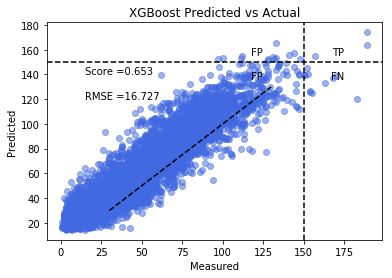

In [323]:
ploter(y_test_15,X_test_15,O3_15_q,model_15_q)

In [325]:
# and later you can load it
O3_15_q = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_15hora_quantile.pkl')

## Modelo Normal

In [191]:
model_14 = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,verbose=1,random_state=123)#,n_estimators=1000

In [327]:
model_15 = XGBRegressor(learning_rate=0.1,n_estimators=300,n_jobs=64,random_state=123)

In [328]:
model_15.fit(X_train_15, y_train_15)

/home/paw/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=64,
       nthread=None, objective='reg:linear', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [330]:
O3_15 = model_15.predict(X_test_15)

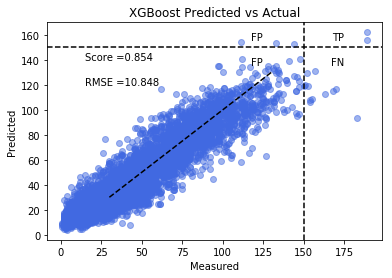

In [331]:
ploter(y_test_15,X_test_15,O3_15,model_15)

In [340]:
# and later you can load it
model_15 = joblib.load('/home/paw/DanielBustillos/Notebooks/Modelos/O3_15hora.pkl')